In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# MLB Sticky Substance Crackdown

2021년 6월 3일, MLB에서 투수의 sticky substance에 대한 단속(crackdown)을 시행했다. sticky substance는 투수의 손과 공의 마찰을 높여 공의 회전수를 증가시키는 역할을 한다. 21시즌 4월부터 7월까지의 데이터를 6월 3일 이전과 이후로 나누어 포심패스트볼에 어떠한 변화가 일어났는지 분석하였다. 

In [2]:
# 2021년 4월~7월까지의 포심패스트볼 데이터
ff_0401 = pd.read_csv('ff_data_0401-0416.csv')
ff_0417 = pd.read_csv('ff_data_0417-0430.csv')
ff_0501 = pd.read_csv('ff_data_0501-0521.csv')
ff_0522 = pd.read_csv('ff_data_0522-0611.csv')
ff_0612 = pd.read_csv('ff_data_0612-0630.csv')
ff_0701 = pd.read_csv('ff_data_0701-0716.csv')
ff_0717 = pd.read_csv('ff_data_0717-0731.csv')

In [3]:
ff_total = pd.concat([ff_0401, ff_0417, ff_0501, ff_0522, ff_0612, ff_0701, ff_0717])

In [4]:
ff = ff_total[['pitch_type', 'game_date', 'release_speed', 'release_pos_x','release_pos_z', 
          'player_name', 'events', 'description', 'zone','stand', 'p_throws','type',
          'pfx_x','pfx_z', 'plate_x', 'plate_z','release_spin_rate']]

### 평균 회전수 변화

In [5]:
# 날짜별 포심패스트볼 평균 회전 수
spin_date = ff.groupby('game_date')['release_spin_rate'].mean().reset_index()

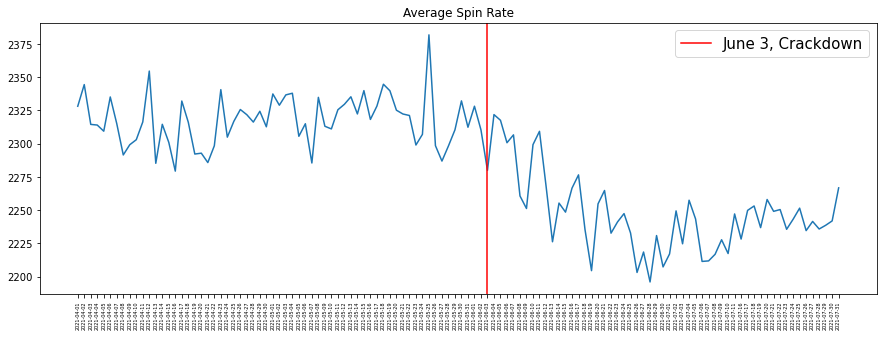

In [6]:
plt.figure(figsize=(15,5))
plt.plot(spin_date['game_date'], spin_date['release_spin_rate'])
plt.title('Average Spin Rate')
plt.xticks(fontsize=5, rotation=90)
plt.axvline('2021-06-03', color='red', label='June 3, Crackdown')
plt.legend(prop={'size': 15})
plt.show()

6월 3일, 단속이 시작한 이후 회전 수가 감소하는 경향을 보인다.

### Swing & Miss 변화

In [7]:
swing = ['foul','hit_into_play','swinging_strike','foul_tip','swinging_strike_blocked']
swing_miss = ['swinging_strike','foul_tip','swinging_strike_blocked']

In [8]:
# 단속 이전, 이후
ff['crackdown'] = np.where(ff['game_date']<'2021-06-03','before_crackdown','after_crackdown')
bf = ff[ff['crackdown']=='before_crackdown']
af = ff[ff['crackdown']=='after_crackdown']

In [9]:
# Swiing & Miss 비율
swing_miss_before = len(bf[bf['description'].isin(swing_miss)])/len(bf[bf['description'].isin(swing)])
swing_miss_after = len(af[af['description'].isin(swing_miss)])/len(af[af['description'].isin(swing)])

In [10]:
(round(swing_miss_before,4), round(swing_miss_after,4))

(0.2335, 0.2185)

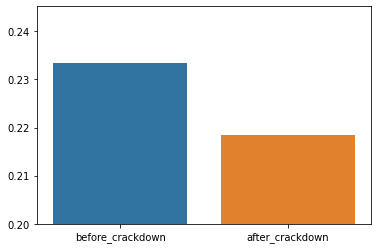

In [11]:
x = ['before_crackdown', 'after_crackdown']
y = [swing_miss_before, swing_miss_after]
sns.barplot(x,y)
plt.ylim(0.2)
plt.show()

단속을 시작한 이후, Swing & Miss 비율이 줄어들었다. 이는 공의 회전 수 감소로 인해 포심의 무브먼트가 감소하였고, 이로 인해 헛스윙하는 비율이 줄어든 것으로 보여진다.

# 

### 특정 투수들에 대한 데이터 분석

In [12]:
# 6월 3일 이후, 포심 회전수가 감소한 투수 3명
bauer = ff[ff['player_name']=='Bauer, Trevor']
cole = ff[ff['player_name']=='Cole, Gerrit']
walker = ff[ff['player_name']=='Buehler, Walker']

#### 평균 회전수 변화

In [13]:
pitcher_3 = pd.concat([bauer,cole,walker])
pitcher_spin = pitcher_3.groupby(['game_date','player_name'])['release_spin_rate'].mean().reset_index()

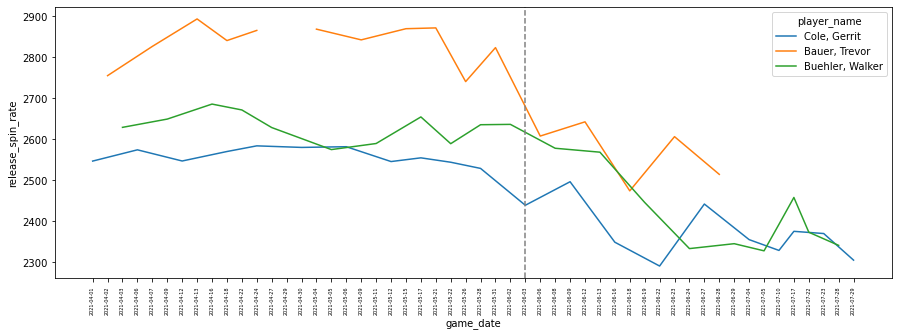

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(data=pitcher_spin, x='game_date', y='release_spin_rate', hue='player_name')
plt.axvline('2021-06-03', color='gray', label='June 3, Crackdown', linestyle='--')
plt.xticks(fontsize=5, rotation=90)
plt.show()

#### 무브먼트 변화

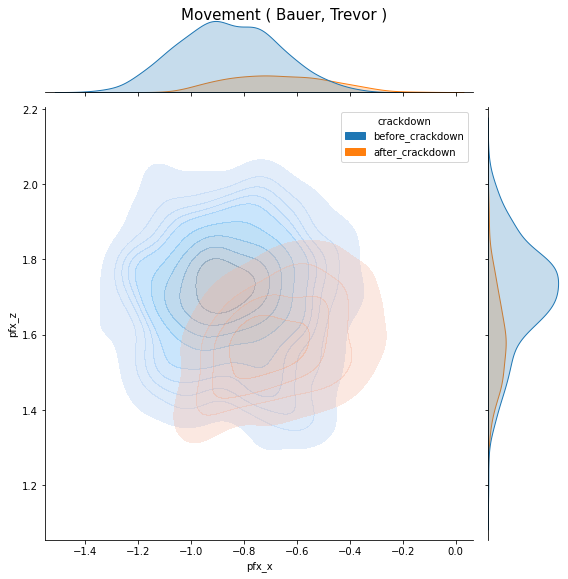

In [15]:
sns.jointplot(x='pfx_x', y='pfx_z',hue='crackdown', height=8, data=bauer, kind='kde',fill=True, joint_kws={'alpha': 0.3})
plt.suptitle('Movement ( Bauer, Trevor )', y=1, size=15)
plt.show()

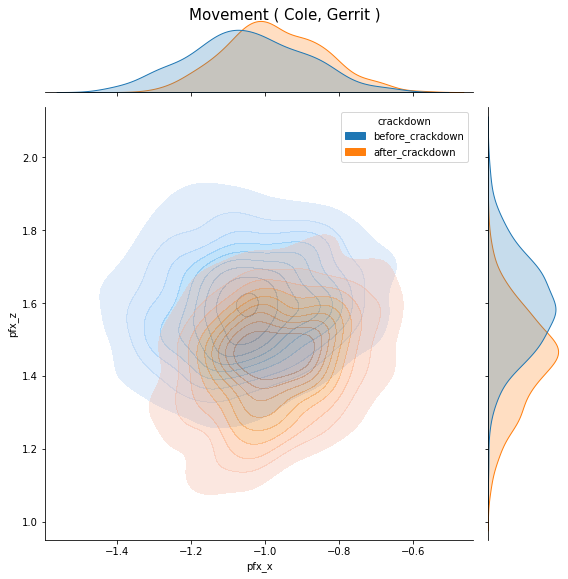

In [16]:
sns.jointplot(x='pfx_x', y='pfx_z',hue='crackdown', height=8, data=cole, kind='kde',fill=True, joint_kws={'alpha': 0.3})
plt.suptitle('Movement ( Cole, Gerrit )', y=1, size=15)
plt.show()

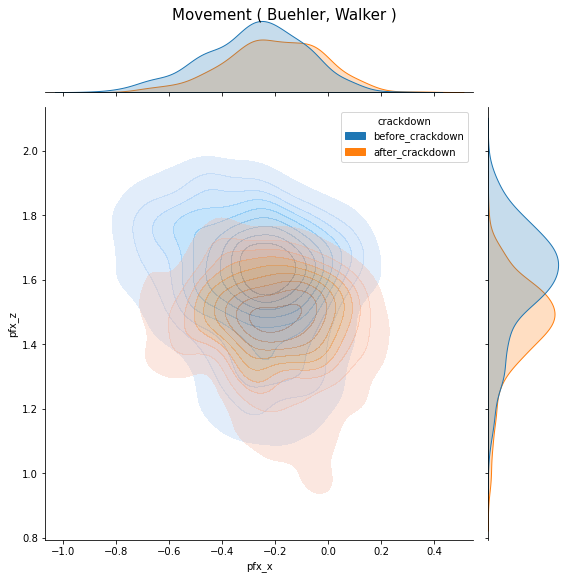

In [17]:
sns.jointplot(x='pfx_x', y='pfx_z',hue='crackdown', height=8, data=walker, kind='kde',fill=True, joint_kws={'alpha': 0.3})
plt.suptitle('Movement ( Buehler, Walker )', y=1, size=15)
plt.show()

3명의 투수 모두 단속 이전과 이후 무브먼트에 변화가 생겼다. 단속 이후, 포심의 회전수가 감소하는 경향을 보이면서 무브먼트 또한 작아지는 모습을 보였다. 포심의 회전수가 주로 영향을 주는 상하 무브먼트를 그래프로 살펴보면, 투구의 분포가 단속 이전에 비해 단속 이후 아래쪽으로 형성되어 있는 것을 확인할 수 있었다.

### 결론

MLB에서 21년 6월 3일 sticky substance에 대한 단속을 시행하였다. MLB에서 투고타저 현상이 이어지자 이를 완화하기 위해 시행된 단속으로 보여진다. 기록을 확인해보면 MLB의 의도대로 단속 이후 투수들의 포심패스트볼 회전 수가 감소하는 것을 확인할 수 있었다.   
   
백스핀이 걸리는 포심은 회전 수가 높을수록 위쪽으로 향하는 무브먼트가 커진다. Trevor Bauer, Gerrit Cole, Walker Buehler 세 투수의 기록을 확인해보면, 단속 이후 공의 회전수 감소가 무브먼트 감소로 이어지는 현상을 확인할 수 있었다. 단속 이전보다 이후에 포심의 분포도가 아래쪽에 형성되어있는 것을 볼 수 있다.
   
이 무브먼트의 감소는 타자들의 Swing & Miss 비율을 줄어들게 만들었다. 단속 이전보다 포심의 무브먼트가 줄어들어서 타자들이 공을 맞히는 비중이 높아졌다고 할 수 있다.